<a href="https://colab.research.google.com/github/anish3565/QML/blob/main/Quantum_SVM/QSVC_wine_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install qiskit-algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 3.5 MB/s eta 0:00:00


In [ ]:
!pip install qiskit_machine_learning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 3.6 MB/s eta 0:00:00


- ZZFeatureMap → Quantum feature map for data encoding
- Sampler → Executes quantum circuits
- QSVC → Quantum-enhanced Support Vector Classifier
- FidelityQuantumKernel → Computes quantum kernel based on fidelity
- ComputeUncompute → Measures fidelity efficiently

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_algorithms.state_fidelities import ComputeUncompute

In [ ]:
# 📌 1️⃣ Load Dataset & Extract Parameters
wine_data = load_wine()
X, y = wine_data.data, wine_data.target  # Features & Target

✅ Loads Wine Dataset

- X → Feature matrix (chemical properties of wine)
- y → Labels (0 = class 1, 1 = class 2, 2 = class 3)

Instances: 178
Attributes: 14 (13 numeric and 1 predictive)

In [ ]:
# Display dataset information
print("\n📝 Dataset Description:\n", wine_data['DESCR'])
print("\n📌 Feature Names:\n", wine_data['feature_names'])
print("\n🎯 Target Classes:\n", wine_data['target_names'])
print("\n📊 Data Shape (samples, features):", X.shape)

# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=wine_data['feature_names'])
df['target'] = y
print("\n🔹 First 5 rows of the dataset:\n", df.head())


📝 Dataset Description:
 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                   

In [ ]:
# 📌 2️⃣ Preprocessing & Splitting Data
def preprocess_wine(training_size, test_size, n_features, plot_data=False):
    """ Preprocess the Wine dataset by scaling, PCA, and splitting """

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Standardization (zero mean, unit variance)
    std_scaler = StandardScaler().fit(X_train)
    X_train = std_scaler.transform(X_train)
    X_test = std_scaler.transform(X_test)

    # PCA for feature reduction
    pca = PCA(n_components=n_features).fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)

    # MinMax Scaling (-1 to 1 for quantum processing)
    minmax_scaler = MinMaxScaler(feature_range=(-1, 1)).fit(np.vstack((X_train, X_test)))
    X_train = minmax_scaler.transform(X_train)
    X_test = minmax_scaler.transform(X_test)

    # Reduce dataset size for training & testing
    X_train, y_train = X_train[:training_size], y_train[:training_size]
    X_test, y_test = X_test[:training_size], y_test[:training_size]

    # Plot if required
    if plot_data:
        for k in range(3):
            plt.scatter(X_train[y_train == k, 0], X_train[y_train == k, 1])
        plt.title("PCA Reduced Wine Dataset")
        plt.show()

    return X_train, y_train, X_test, y_test

-----------------------------------------

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)


✅ Splits data into training & test sets

- 80% train, 20% test

-----------------------------------------

    std_scaler = StandardScaler().fit(X_train)
    X_train = std_scaler.transform(X_train)
    X_test = std_scaler.transform(X_test)

✅ Standardizes dataset

- Ensures zero mean & unit variance

----------------------------------------

    pca = PCA(n_components=n_features).fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)

✅ Applies PCA for dimensionality reduction

- Reduces data to n_features (2 for visualization)

----------------------------------------

    minmax_scaler = MinMaxScaler(feature_range=(-1, 1)).fit(np.vstack((X_train, X_test)))
    X_train = minmax_scaler.transform(X_train)
    X_test = minmax_scaler.transform(X_test)

✅ Scales values between -1 and 1

- Required for quantum algorithms

----------------------------------------

    X_train, y_train = X_train[:training_size], y_train[:training_size]
    X_test, y_test = X_test[:training_size], y_test[:training_size]

✅ Limits dataset size for efficiency

----------------------------------------

    if plot_data:
        for k in range(3):
            plt.scatter(X_train[y_train == k, 0], X_train[y_train == k, 1])
        plt.title("PCA Reduced Wine Dataset")
        plt.show()


✅ Plots the dataset if plot_data=True

- Uses the first 2 PCA components

----------------------------------------

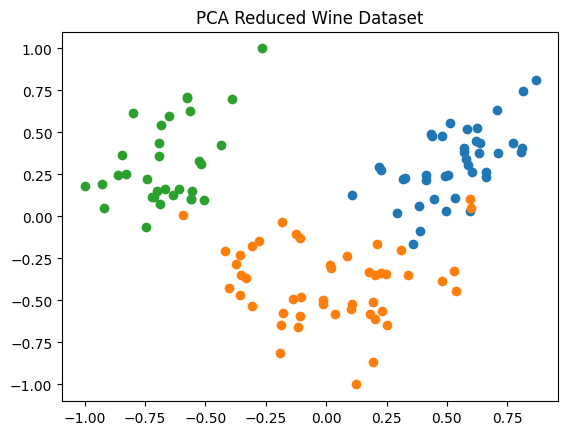

In [ ]:
train_data, train_labels, test_data, test_labels = preprocess_wine(
    training_size=120, test_size=20, n_features=2, plot_data=True
)

In [ ]:
from qiskit.primitives import Sampler

# 📌 3️⃣ Quantum Feature Mapping & Kernel Setup
feature_map = ZZFeatureMap(2)
fidelity = ComputeUncompute(sampler=Sampler())
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)

# 📌 4️⃣ Train & Evaluate QSVM
qsvc = QSVC(quantum_kernel=quantum_kernel, decision_function_shape='ovr')
qsvc.fit(train_data, train_labels)

print(f'\n✅ Training Accuracy: {qsvc.score(train_data, train_labels)}')
print(f'✅ Test Accuracy: {qsvc.score(test_data, test_labels)}')

<ipython-input-11-6457f9bc16d5>:5: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  fidelity = ComputeUncompute(sampler=Sampler())



✅ Training Accuracy: 0.8916666666666667
✅ Test Accuracy: 0.8


-----------------------------------------

    feature_map = ZZFeatureMap(2)

✅ Encodes classical data into quantum states

- Uses 2 qubits for 2 PCA features

-----------------------------------------

    fidelity = ComputeUncompute(sampler=Sampler())
    quantum_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)

✅ Computes quantum kernel matrix

- Uses quantum state fidelity

-----------------------------------------

5️⃣ Train & Evaluate QSVM

    qsvc = QSVC(quantum_kernel=quantum_kernel, decision_function_shape='ovr')


✅ Creates Quantum SVM Classifier

ovr → One-Versus-Rest for multi-class

-----------------------------------------

    qsvc.fit(train_data, train_labels)

✅ Trains QSVC on quantum-enhanced data

-----------------------------------------

print(f'\n✅ Training Accuracy: {qsvc.score(train_data, train_labels)}')


print(f'✅ Test Accuracy: {qsvc.score(test_data, test_labels)}')

✅ Evaluates model performance

- Prints training & testing accuracy

-----------------------------------------

In [ ]:
! pip freeze | grep qiskit

qiskit==1.3.2
qiskit-algorithms==0.3.1
qiskit-machine-learning==0.8.2
